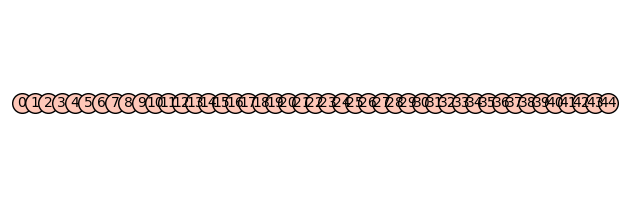

[[0, 1, 2, 3, 4, 5, 6, 7, 8], [9, 10, 11, 12, 13, 14, 15, 16, 17], [18, 19, 20, 21, 22, 23, 24, 25, 26], [27, 28, 29, 30, 31, 32, 33, 34, 35], [36, 37, 38, 39, 40, 41, 42, 43, 44]]


In [54]:
#S(4,4)=45
#step1
g=Graph(45)
show(g.plot())
K=[[0,1,2,3],[9, 10, 11, 12],[18, 19, 20, 21],[27, 28, 29, 30],[36, 37, 38, 39]]
Star=[[4,5,6,7,8],[13, 14, 15, 16, 17],[22, 23, 24, 25, 26],[31, 32, 33, 34, 35],[40, 41, 42, 43, 44]]
rows, cols = (5, 9)
v = [[i*cols+j for j in range(cols)] for i in range(rows)]
print(v)

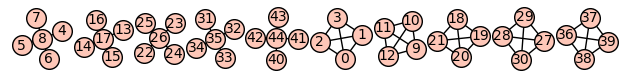

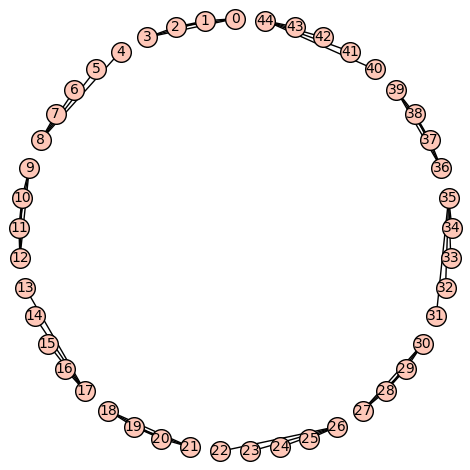

In [55]:
#step2
for i in range(rows):
    #K4X5
    g.add_cycle(K[i]);g.add_edges([(K[i][0], K[i][2]),(K[i][1], K[i][3])]);
    #StarGraph(4)X5
    g.add_path([Star[i][0], Star[i][4],Star[i][1]]);g.add_path([Star[i][2], Star[i][4],Star[i][3]]);
show(g.plot()) 
show(g.plot(layout="circular"));


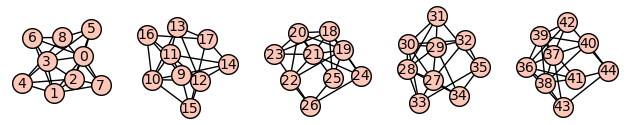

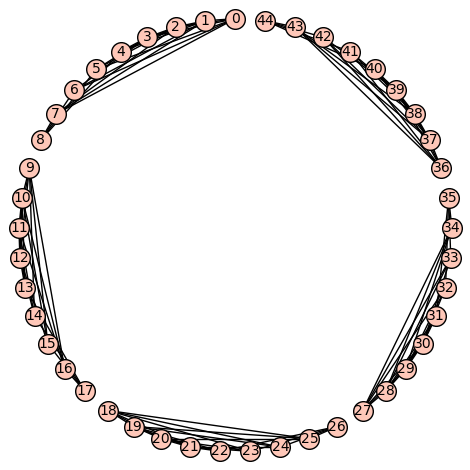

In [56]:
#step3 connect K4 and Star4
for i in range(rows):
    g.add_edges([(K[i][0], Star[i][1]),(K[i][0], Star[i][2]),(K[i][0], Star[i][3])])
    g.add_edges([(K[i][1], Star[i][0]),(K[i][1], Star[i][2]),(K[i][1], Star[i][3])])
    g.add_edges([(K[i][2], Star[i][0]),(K[i][2], Star[i][1]),(K[i][2], Star[i][3])])
    g.add_edges([(K[i][3], Star[i][0]),(K[i][3], Star[i][1]),(K[i][3], Star[i][2])])

show(g.plot()) 
show(g.plot(layout="circular"))

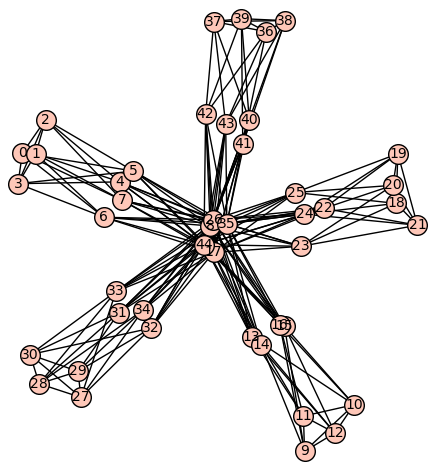

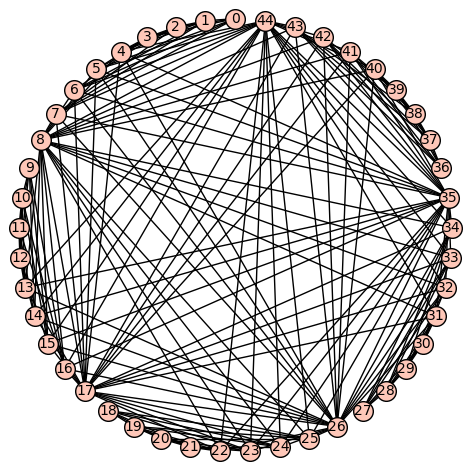

In [57]:
#step4 5 star centers 4*5+2

for i in range(rows):
    g.add_path([Star[(i+1)%rows][0], Star[i][4],Star[(i+1)%rows][1]]);g.add_path([Star[(i+1)%rows][2], Star[i][4],Star[(i+1)%rows][3]]);
    g.add_path([Star[(i+2)%rows][0], Star[i][4],Star[(i+2)%rows][1]]);g.add_path([Star[(i+2)%rows][2], Star[i][4],Star[(i+2)%rows][3]]);
    g.add_path([Star[(i+3)%rows][0], Star[i][4],Star[(i+3)%rows][1]]);g.add_path([Star[(i+3)%rows][2], Star[i][4],Star[(i+3)%rows][3]]);
    g.add_path([Star[(i+4)%rows][0], Star[i][4],Star[(i+4)%rows][1]]);g.add_path([Star[(i+4)%rows][2], Star[i][4],Star[(i+4)%rows][3]]);

g.add_cycle([Star[0][4],Star[1][4],Star[2][4],Star[3][4],Star[4][4]])
show(g.plot())
show(g.plot(layout="circular"));


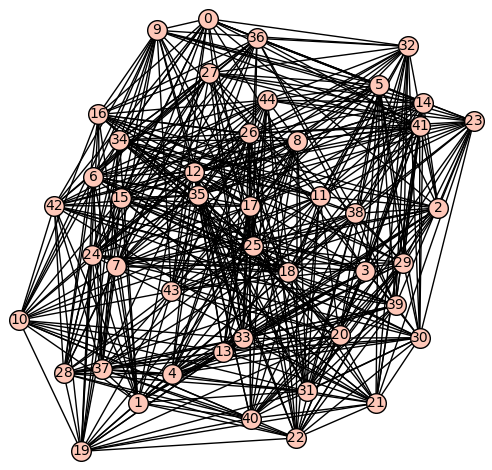

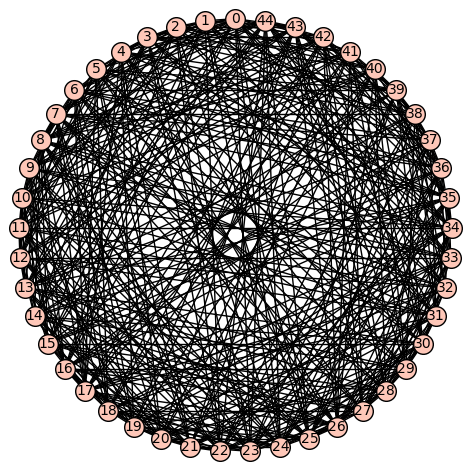

In [58]:
#step5 K4 node (3+3) + 3*4+2 +2
for j in range(4):
    g.add_cycle([K[0][j],K[1][j],K[2][j],K[3][j],K[4][j]])
for i in range(rows):
    for j in range(1,5):
        g.add_edges([(K[i][0], Star[(i+j)%rows][1]),(K[i][0], Star[(i+j)%rows][2]),(K[i][0], Star[(i+j)%rows][3])])
        g.add_edges([(K[i][1], Star[(i+j)%rows][0]),(K[i][1], Star[(i+j)%rows][2]),(K[i][1], Star[(i+j)%rows][3])])
        g.add_edges([(K[i][2], Star[(i+j)%rows][0]),(K[i][2], Star[(i+j)%rows][1]),(K[i][2], Star[(i+j)%rows][3])])
        g.add_edges([(K[i][3], Star[(i+j)%rows][0]),(K[i][3], Star[(i+j)%rows][1]),(K[i][3], Star[(i+j)%rows][2])])
show(g.plot())
show(g.plot(layout="circular"));

In [59]:
'''
#以下边加入后 g.clique_number() 为5 g.complement().clique_number()为8
#step6 5 StarGraph
for j in range(4):
    g.add_cycle([Star[0][j],Star[1][j],Star[2][j],Star[3][j],Star[4][j]])
'''
#step6 add cycles between K4and Star4
#for j in range(4):
#    g.add_cycle([K[0][j],Star[1][j],K[2][j],Star[3][j],K[4][j]])
#    g.add_cycle([Star[0][j],K[1][j],Star[2][j],K[3][j],Star[4][j]])

#for j in range(4):
#    g.add_cycle([Star[0][j],Star[1][j],Star[2][j],Star[3][j],Star[4][j]])


'\n#以下边加入后 g.clique_number() 为5 g.complement().clique_number()为8\n#step6 5 StarGraph\nfor j in range(4):\n    g.add_cycle([Star[0][j],Star[1][j],Star[2][j],Star[3][j],Star[4][j]])\n'

In [60]:
adj=g.adjacency_matrix();print(adj)
print(g.degree_sequence())
print(g.clique_number())
print(g.complement().clique_number())

[0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0]
[1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0]
[1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0]
[1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0]
[0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1]
[1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1]
[1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1]
[1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1]
[0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1]
[1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0]
[0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0

In [61]:
print(g.clique_number())
print(g.complement().clique_number())

print(g.cliques_maximum())
#print(g.complement().cliques_maximum())

#from sage.graphs.independent_sets import IndependentSets
#print(list(IndependentSets(g, maximal=True)))

4
20
[[0, 1, 2, 3], [0, 1, 2, 7], [0, 1, 2, 16], [0, 1, 2, 25], [0, 1, 2, 34], [0, 1, 2, 43], [0, 1, 3, 6], [0, 1, 3, 15], [0, 1, 3, 24], [0, 1, 3, 33], [0, 1, 3, 42], [0, 2, 3, 5], [0, 2, 3, 14], [0, 2, 3, 23], [0, 2, 3, 32], [0, 2, 3, 41], [1, 2, 3, 4], [1, 2, 3, 13], [1, 2, 3, 22], [1, 2, 3, 31], [1, 2, 3, 40], [4, 10, 11, 12], [4, 19, 20, 21], [4, 28, 29, 30], [4, 37, 38, 39], [5, 9, 11, 12], [5, 18, 20, 21], [5, 27, 29, 30], [5, 36, 38, 39], [6, 9, 10, 12], [6, 18, 19, 21], [6, 27, 28, 30], [6, 36, 37, 39], [7, 9, 10, 11], [7, 18, 19, 20], [7, 27, 28, 29], [7, 36, 37, 38], [9, 10, 11, 12], [9, 10, 11, 16], [9, 10, 11, 25], [9, 10, 11, 34], [9, 10, 11, 43], [9, 10, 12, 15], [9, 10, 12, 24], [9, 10, 12, 33], [9, 10, 12, 42], [9, 11, 12, 14], [9, 11, 12, 23], [9, 11, 12, 32], [9, 11, 12, 41], [10, 11, 12, 13], [10, 11, 12, 22], [10, 11, 12, 31], [10, 11, 12, 40], [13, 19, 20, 21], [13, 28, 29, 30], [13, 37, 38, 39], [14, 18, 20, 21], [14, 27, 29, 30], [14, 36, 38, 39], [15, 18, 19, 2